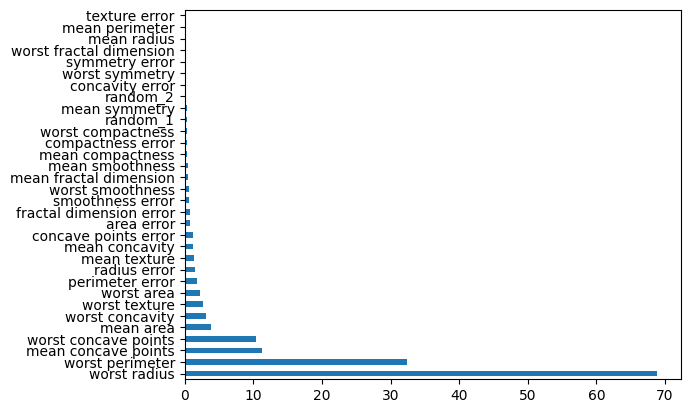

Cross-validation accuracy: 0.95 (+/- 0.03)
Cross-validation accuracy (top 5 features): 0.94 (+/- 0.05)


In [1]:

import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the breast cancer dataset
data = load_breast_cancer()
x_data = pd.DataFrame(data.data, columns=data.feature_names)
y_data = pd.Series(data.target)
# Add two columns with random values to the DataFrame
x_data['random_1'] = np.random.rand(x_data.shape[0])
x_data['random_2'] = np.random.rand(x_data.shape[0])
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)
# Create an XGBoost classifier
model_xgb = xgb.XGBClassifier()
# Train the classifier on the training data
model_xgb.fit(x_data, y_data)
############### Calculate the feature importance using the weight importance type
#alternative importance_type 
#gain: The average gain of the feature when it is used in trees.
#weight: The number of times a feature is used to split the data across all trees.
#cover: The average coverage of the feature when it is used in trees.
#total_gain: The total gain of the feature when it is used in trees.
#total_cover: The total coverage of the feature when it is used in trees.
feat_importances = pd.Series(model_xgb.get_booster().get_score(importance_type='gain'), index=x_data.columns)
feat_importances.nlargest(100).plot(kind='barh')
plt.show()
# Perform cross-validation with accuracy as the scoring metric
scores = cross_val_score(model_xgb, x_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})')
# Select the top 5 features based on their importance scores
top_features = feat_importances.nlargest(5).index
x_data_top = x_data[top_features]
# Recalculate the cross-validation using only the top 5 features
scores_top = cross_val_score(model_xgb, x_data_top, y_data, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy (top 5 features): {scores_top.mean():.2f} (+/- {scores_top.std() * 2:.2f})')
